#  **What are Generative Adversarial Networks?**

GAN stands for Generative Adversarial Network. It is a class of machine learning frameworks and a prominent framework for approaching generative AI. The concept was initially developed by Ian Goodfellow and his colleagues in June 2014.

 
 

 

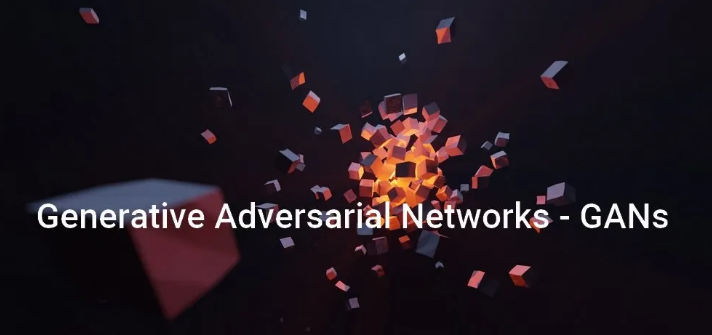

In a GAN, two neural networks contest with each other in the form of a zero-sum game, where one agent's gain is another agent's loss. The two neural networks that make up a GAN are referred to as the **generator and the discriminator**.

* The generator is a convolutional neural network and 
* the discriminator is a deconvolutional neural network.

The generator is responsible for creating new data, while the discriminator is responsible for distinguishing between real data and data created by the generator. The two networks are trained simultaneously, with the generator trying to fool the discriminator and the discriminator trying to correctly identify real and fake data.

## **Architecture of GAN**:

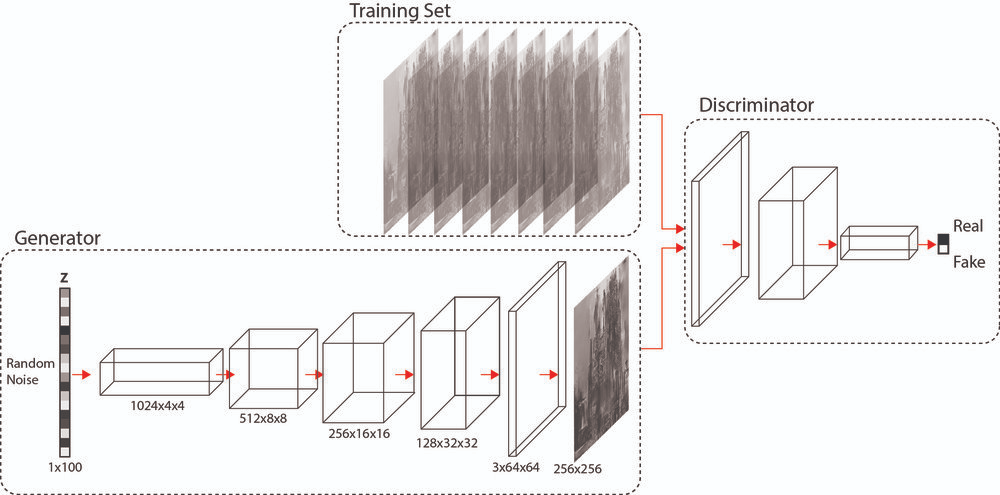


Let's dive into the architecture of a Generative Adversarial Network (GAN) in more depth. GANs consist of two primary components: **a generator and a discriminator**Each component has its own architecture and serves a specific purpose in the adversarial training process.


 
## **1. Generator:**


The generator takes random noise as input and aims to generate synthetic data samples that resemble the training data. The architecture of the generator can vary depending on the specific application and the type of data being generated. Here are some common architectural elements and techniques used in the generator:

   - **Input Layer**: The generator typically takes a low-dimensional noise vector, such as a 100-dimensional random vector, as input. This noise vector acts as a seed for generating the desired output data.
   
   
   
   - **Hidden Layers**: The generator consists of multiple hidden layers, which can be fully connected layers or convolutional layers. These layers progressively transform the input noise vector into a higher-dimensional representation that approximates the target data distribution.
   
   
   
   - **Activation Functions**: Activation functions, such as ReLU (Rectified Linear Unit) or LeakyReLU, are applied after each hidden layer to introduce non-linearity and enable the network to learn complex patterns and structures.
   
   
   
   
   - **Upsampling Operations**: In the case of image generation, the generator often employs upsampling operations to increase the spatial dimensions of the data. This can be achieved through transposed convolutions (also known as deconvolutions or fractionally strided convolutions) or nearest neighbor upsampling followed by convolutional layers.
   
   
   
   
   
   - **Output Layer**: The final layer of the generator produces the generated output data. For image generation, it typically consists of a convolutional layer followed by an activation function such as sigmoid or tanh, which squashes the output to a suitable range (e.g., [0, 1] for image pixel values).

 

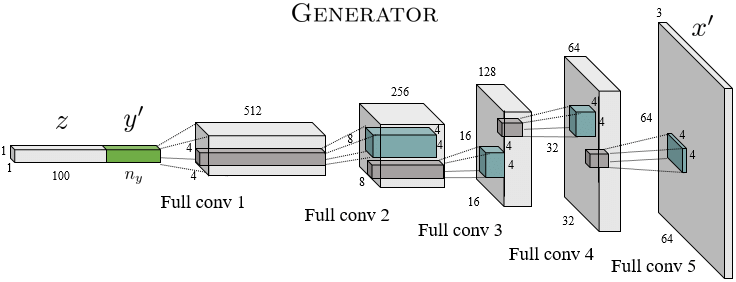


## **2. Discriminator:**

The discriminator acts as a classifier that evaluates whether a given data sample is real (from the training set) or fake (generated by the generator). The architecture of the discriminator is typically designed to perform binary classification. Here are some architectural elements and techniques commonly used in the discriminator:

   - **Input Layer**: The discriminator takes as input either a real or generated data sample. The input dimensions match the dimensions of the target data (e.g., for images, the input dimensions are the width, height, and number of channels).
   
   
   
   - **Hidden Layers**: Similar to the generator, the discriminator consists of multiple hidden layers, which can be fully connected layers or convolutional layers. These layers analyze the input data and extract relevant features to make the classification decision.
   
   
   
   
   - **Activation Functions**: Activation functions, such as ReLU or LeakyReLU, are applied after each hidden layer to introduce non-linearity and enable the network to learn complex decision boundaries.
   
   
   
   
   
   - **Downsampling Operations**: In the case of image-based tasks, downsampling operations like pooling or strided convolutions are often used to reduce the spatial dimensions of the data while increasing the number of channels.
   
   
   
   
   - **Output Layer**: The final layer of the discriminator is a dense layer with a sigmoid activation function. It produces a single scalar output, representing the probability that the input sample is real. Values close to 1 indicate a high likelihood of the input being real, while values close to 0 indicate a high likelihood of the input being fake.
   


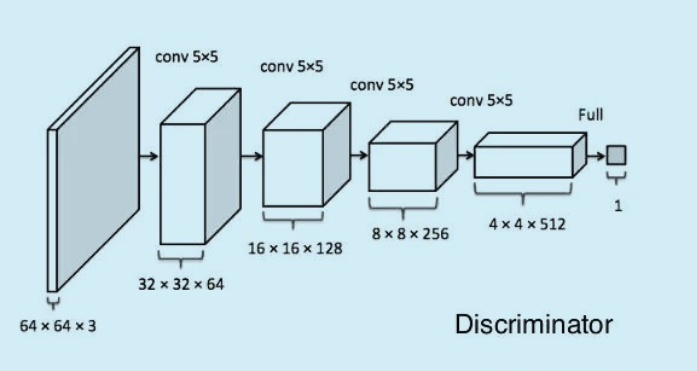

## Overview of GAN Architecture

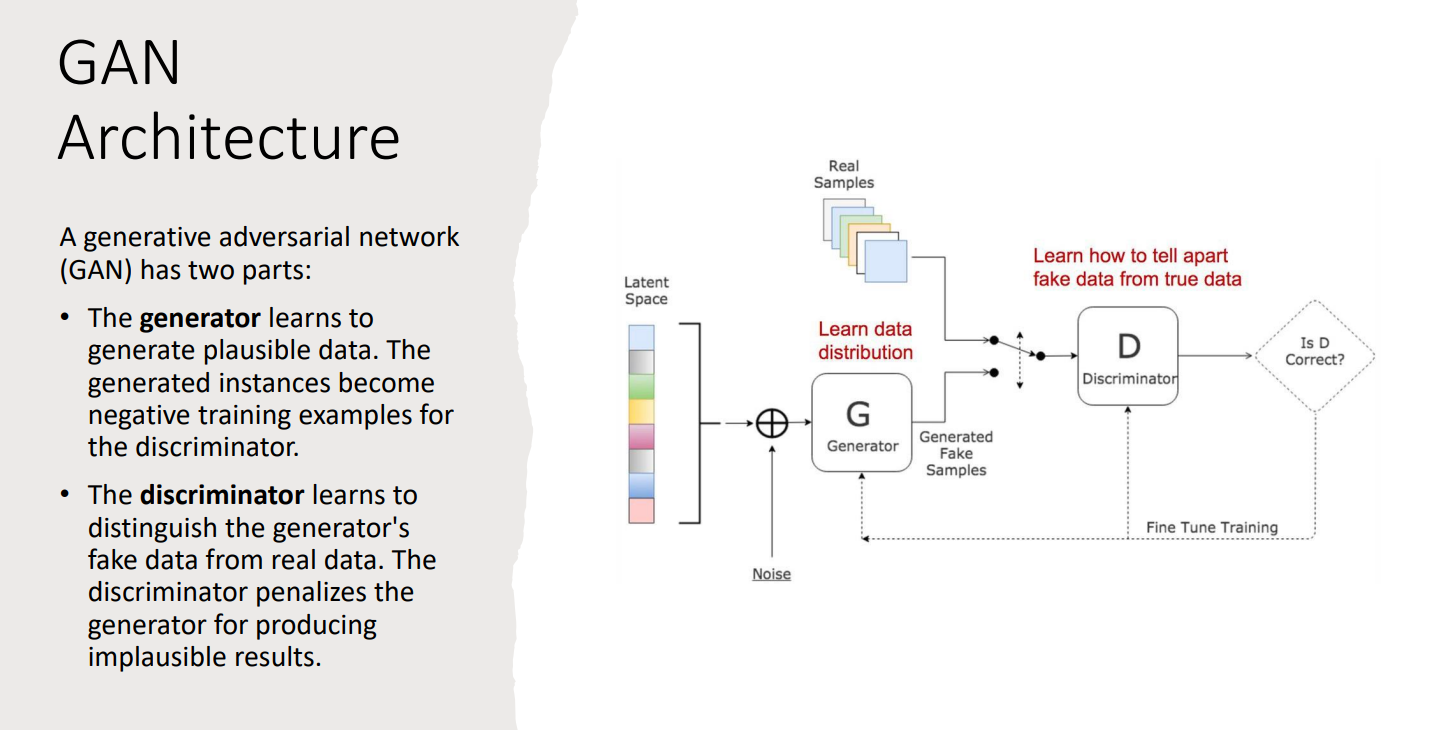

## Pratical Cifar Data Overview Steps

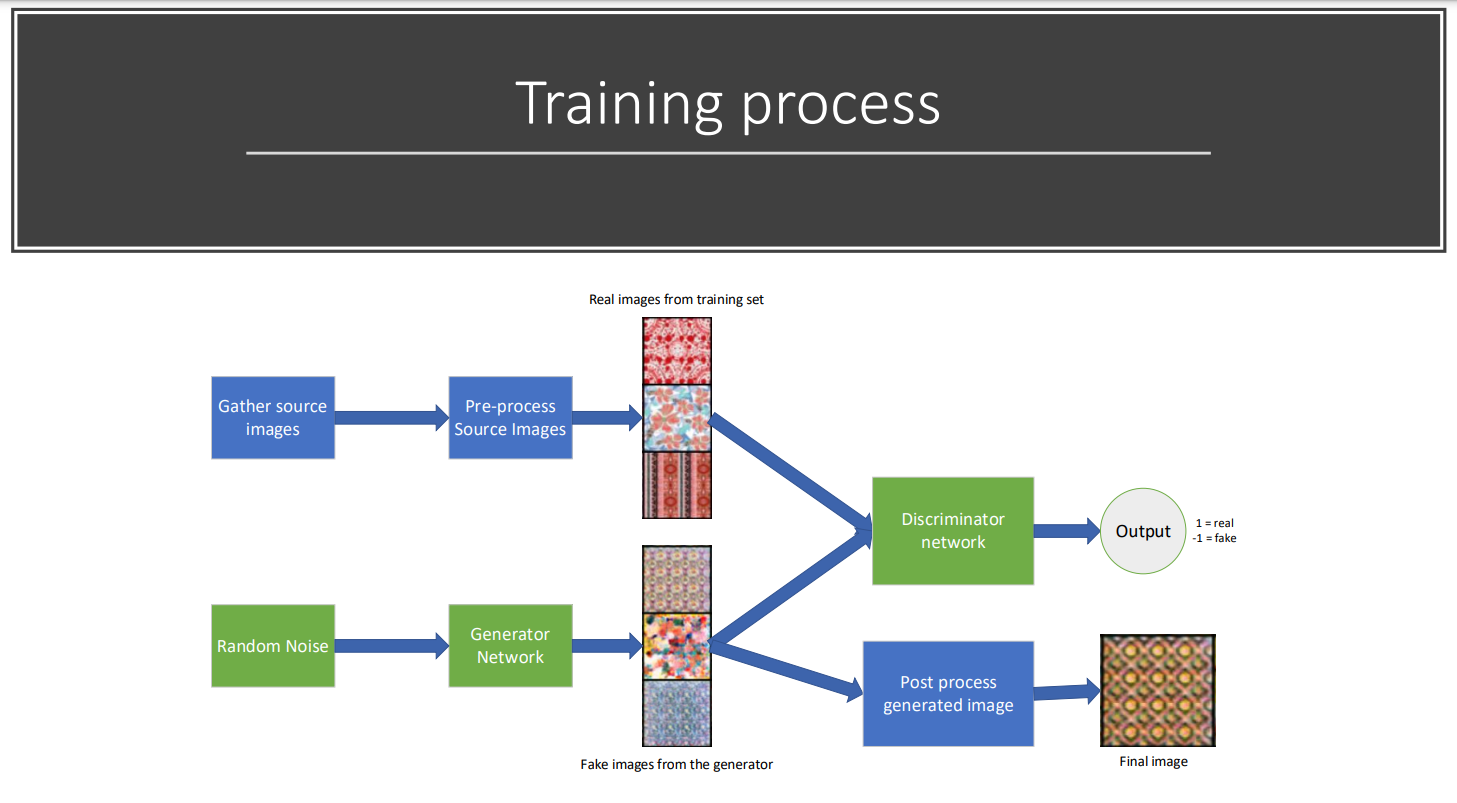

 I'll walk you through the step-by-step execution of a GAN using both the generator and discriminator components for the CIFAR-10 dataset. Here's an outline of the process:

1. **Import Libraries**: Start by importing the necessary libraries such as TensorFlow, Keras, and NumPy........

 

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


2. **Load and Preprocess Data**: Load the CIFAR-10 dataset and preprocess the images. This may involve normalizing the pixel values or resizing the images to a desired size.

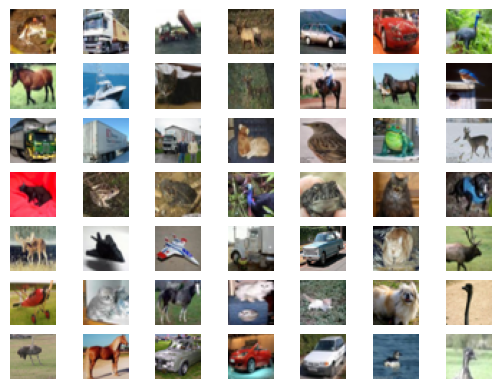

In [102]:
# example of loading and plotting the cifarle dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(49):
  #define subplot
  pyplot.subplot(7, 7, 1 + i)
  # turn off axis
  pyplot.axis('off')
  # plot raw pixel data
  pyplot.imshow(trainX[i])
pyplot.show()

In [103]:
trainX.shape # images =50000 , resolution = 32 ,32 Here 3 = 3D represents(RGB) in the image.

(50000, 32, 32, 3)


3. **Define the Discriminator Model**:
   
   
   
   - Create a discriminator model using Keras or TensorFlow.
   
   
   
   - Define the input shape to match the size of the generated samples (e.g., CIFAR-10 image dimensions).
   
   
   
   - Design the architecture of the discriminator, usually consisting of convolutional layers.
   
   
   
   
   - Apply activation functions (e.g., LeakyReLU) and normalization layers (e.g., BatchNormalization) between the layers.
   
   
   
   
   - The output layer should be a single neuron with a sigmoid activation function to classify the input as real or fake.

## **Discriminator**

In [104]:
# example of defining the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
import numpy as np

In [105]:
# define the stadalone Discriminator model
def define_discriminator(in_shape=(32, 32, 3)):
    model = Sequential()
    # normal
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


## **Explanation**:

Here ,The code defines a discriminator model for a Generative Adversarial Network (GAN). The discriminator is responsible for distinguishing between real and fake samples generated by the generator.

Let's go through the code step by step:

    def define_discriminator(in_shape=(32, 32, 3)):
    model = Sequential()

This function define_discriminator is defined to create the discriminator model. It takes an optional input shape parameter, which is set to (32, 32, 3) by default. The input shape represents the dimensions of the input samples, which in this case are images with a width and height of 32 pixels and 3 channels (RGB).

     model.add(Conv2D(64, (3, 3), padding='same', input_shape=in_shape))
     model.add(LeakyReLU(alpha=0.2))

The first layer added to the model is a convolutional layer (Conv2D) with 64 filters, each of size 3x3. The 'same' padding ensures that the spatial dimensions of the output feature map are the same as the input. The input shape is specified using the input_shape parameter. After the convolutional layer, a LeakyReLU activation function with a small negative slope (alpha=0.2) is applied.

    **model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))**
    **model.add(LeakyReLU(alpha=0.2))**

The second layer is another convolutional layer with 128 filters of size 3x3. The strides=(2, 2) parameter configures the layer to perform downsampling by a factor of 2 in both the width and height dimensions. This reduces the spatial dimensions of the output feature map. Again, a LeakyReLU activation function is applied.

    **model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))**
    **model.add(LeakyReLU(alpha=0.2))**

The third layer is similar to the previous one, with 128 filters and downsampling applied.

    **model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))**
    **model.add(LeakyReLU(alpha=0.2))**

The fourth and final convolutional layer has 256 filters and performs downsampling.

    **model.add(Flatten())**
    **model.add(Dropout(0.4))**
    **model.add(Dense(1, activation="sigmoid"))**

After the convolutional layers, the feature maps are flattened into a 1-dimensional vector using the Flatten layer. Then, a dropout layer with a rate of 0.4 is applied to reduce overfitting. Finally, a fully connected layer (Dense) with a single neuron is added. The activation function for this neuron is a sigmoid function, which outputs a value between 0 and 1 representing the probability that the input sample is real.

    **opt = Adam(lr=0.0002, beta_1=0.5)**
    **model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])**

The model is compiled with the Adam optimizer, which is a popular optimization algorithm. The learning rate (lr) is set to 0.0002 and the beta parameter (beta_1) is set to 0.5. The loss function used is binary cross-entropy, suitable for binary classification problems. Additionally, the accuracy metric is specified for evaluation during training.

    return model

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_54 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_55 (Conv2D)          (None, 4, 4, 256)       

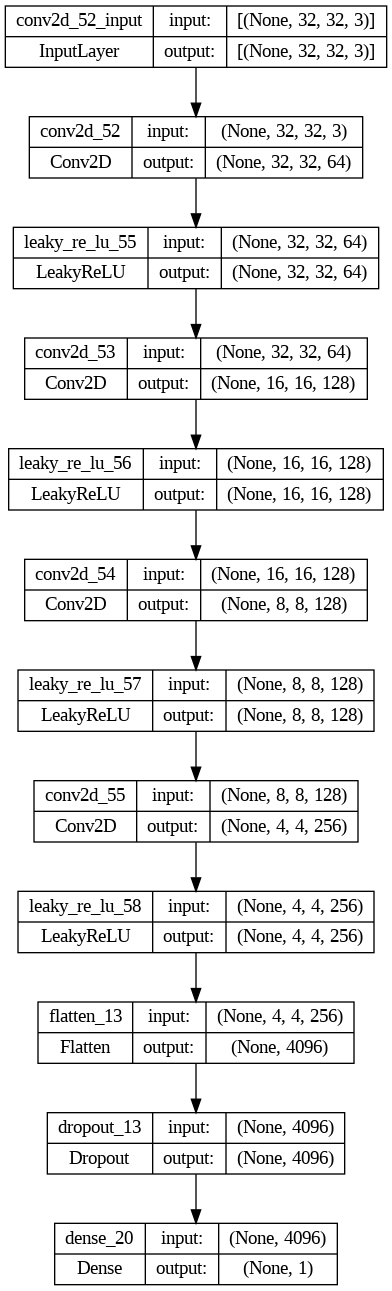

In [106]:
# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)


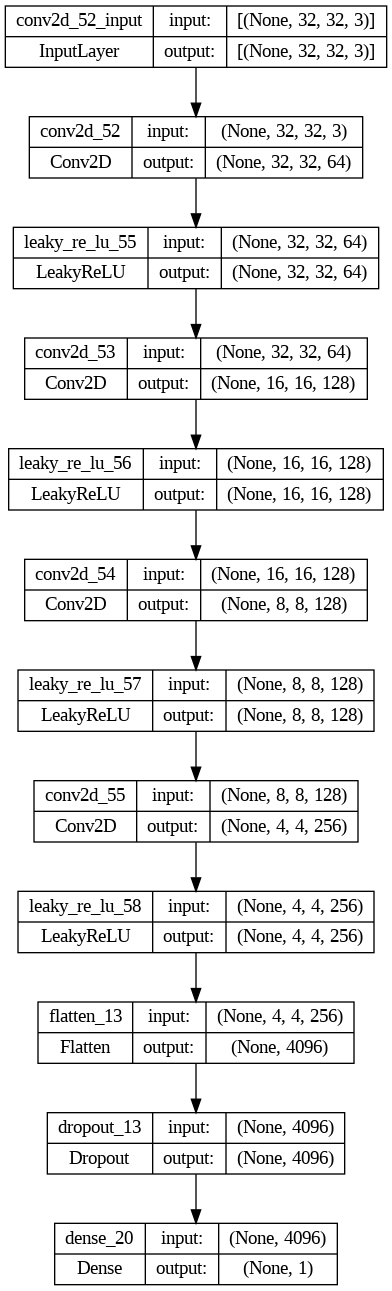

### Load CIFAR-10 dataset

In [107]:
# Function to load the dataset and scale it
def load_real_samples():
    # CIFAR-10 dataset
    (trainX, _), (_, _) = cifar10.load_data()

    # Convert from unsigned ints to floats
    X = trainX.astype('float32')

    # Scale from [0, 255] to [-1, 1]
    X = (X - 127.5) / 127.5

    return X


## Explanation:
The code defines a function called load_real_samples() that is responsible for loading and scaling a dataset. Here's a line-by-line breakdown:

    def load_real_samples():
       (trainX, _), (_, _) = cifar10.load_data()

This line loads the CIFAR-10 dataset using the cifar10.load_data() function. The dataset is divided into training and testing sets. Here, only the training set is loaded, and it's assigned to the variable trainX. The second set of parentheses with underscores _ is used to ignore the testing set.

    X = trainX.astype('float32')

This line converts the data type of trainX from unsigned integers to floats. This is done by using the astype() method and specifying the desired data type as 'float32'.

    X = (X - 127.5) / 127.5

This line scales the pixel values of the images in the dataset. The pixel values originally range from 0 to 255, but here they are rescaled to range from -1 to 1. This is achieved by subtracting 127.5 from each pixel value and then dividing by 127.5.

    return X

Finally, the scaled dataset X is returned from the function.

In summary, the load_real_samples() function loads the CIFAR-10 dataset, converts the data type to floats, and scales the pixel values to the range of -1 to 1.

In [108]:
  X = load_real_samples()


In [109]:
X.shape

(50000, 32, 32, 3)

In [110]:
X[0] # every value is in 1, -1 range

array([[[-0.5372549 , -0.5137255 , -0.5058824 ],
        [-0.6627451 , -0.6392157 , -0.64705884],
        [-0.60784316, -0.62352943, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215687, -0.01960784, -0.2       ],
        [ 0.16078432, -0.02745098, -0.19215687]],

       [[-0.8745098 , -0.84313726, -0.84313726],
        [-1.        , -1.        , -1.        ],
        [-0.85882354, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980393, -0.5686275 ],
        [-0.06666667, -0.34901962, -0.60784316],
        [-0.04313726, -0.31764707, -0.5529412 ]],

       [[-0.8039216 , -0.8117647 , -0.8352941 ],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.6156863 , -0.7882353 , -0.9372549 ],
        ...,
        [-0.07450981, -0.34117648, -0.60784316],
        [-0.05882353, -0.34117648, -0.60784316],
        [-0.14509805, -0.42745098, -0.67058825]],

       ...,

       [[ 0.6313726 ,  0.33333334, -0.24705882],
        [ 0

### Generate Real images

In [111]:
# Select real samples
def generate_real_samples(dataset, n_samples):
    # Choose random instances
    ix = np.random.randint(0, dataset.shape[0], n_samples)

    # Retrieve selected images
    X = dataset[ix]

    # Generate 'real' class labels (1)
    y = np.ones((n_samples, 1))

    return X, y

In [112]:
# Usage example ( REAL DATA)
X, y = generate_real_samples(X, 64)
print(X.shape)
print(y.shape)

(64, 32, 32, 3)
(64, 1)


In [113]:
print(y) # 64 real data

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


### Generate Fake Images

In [114]:
#generate n fake samples with class labels
def generate_fake_samples(n_samples):
    # Generate uniform random numbers in [0,1]
    X = np.random.rand(32 * 32 * 3 * n_samples)

    # Update to have the range [-1, 1]
    X = -1 + X * 2

    # Reshape into a batch of color images
    X = X.reshape((n_samples, 32, 32, 3))

    # Generate ndarray for class labels (0)
    y = np.zeros((n_samples, 1))

    return X, y


## Explanation:
The code in the FOCAL CELL is responsible for generating fake images with class labels. Here's a line-by-line breakdown:

 
    def generate_fake_samples(n_samples):
       X = np.random.rand(32 * 32 * 3 * n_samples)

This function generate_fake_samples takes the number of desired fake samples (n_samples) as input. It generates a 1D array (X) of uniform random numbers between 0 and 1. The array size is calculated by multiplying the dimensions of the images (32x32) with the number of color channels (3) and the number of samples.

    # Update to have the range [-1, 1]
    X = -1 + X * 2

Next, the values in the X array are transformed to have a range from -1 to 1. This is done by multiplying each value by 2 and subtracting 1.

    # Reshape into a batch of color images
    X = X.reshape((n_samples, 32, 32, 3))

The X array is reshaped into a batch of color images. The dimensions are set to (n_samples, 32, 32, 3), where n_samples represents the number of samples, and 32x32x3 represents the height, width, and number of color channels of each image.

    # Generate ndarray for class labels (0)
    y = np.zeros((n_samples, 1))

    return X, y

Finally, an ndarray y is generated to represent the class labels for the fake samples. Here, all class labels are set to 0. The generated fake images (X) and corresponding class labels (y) are returned from the function.

In [115]:
# Usage example ( FAKE DATA)
X, y = generate_real_samples(X,64)
print(X.shape)
print(y.shape)

(64, 32, 32, 3)
(64, 1)


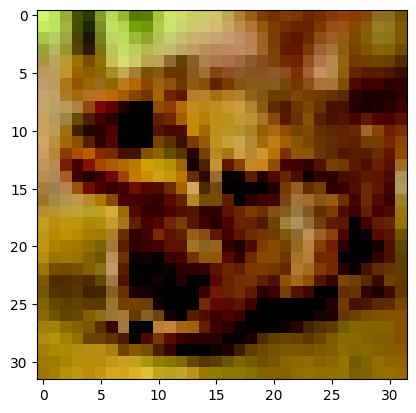

In [116]:
pyplot.imshow(X[0]) # FAKE DATA ( With Noise)

### Train Discriminator

In [117]:
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
    half_batch = int(n_batch / 2)

    # Manually enumerate epochs
    for i in range(n_iter):
        # Get randomly selected 'real' samples
        X_real, y_real = generate_real_samples(dataset, half_batch)

        # Update discriminator on real samples
        _, real_acc = model.train_on_batch(X_real, y_real)

        # Generate 'fake' examples
        X_fake, y_fake = generate_fake_samples(half_batch)

        # Update discriminator on fake samples
        _, fake_acc = model.train_on_batch(X_fake, y_fake)

        # Summarize performance
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))


## Explanation:
The code in the focal cell defines a function called train_discriminator() that is responsible for training a discriminator model. Let's go through the code line by line:

    def train_discriminator(model, dataset, n_iter=20, n_batch=128):

This line defines a function called train_discriminator() that takes four parameters: model, which represents the discriminator model, dataset, which is the dataset used for training, n_iter, which specifies the number of iterations (epochs) for training, and n_batch, which determines the batch size for training.

    half_batch = int(n_batch / 2)

This line calculates the value of half_batch by dividing n_batch by 2 and converting it to an integer. This variable is used to determine the number of real and fake samples to be used in each iteration.

    for i in range(n_iter):

This line starts a loop that iterates n_iter times, representing the number of training epochs.

    X_real, y_real = generate_real_samples(dataset, half_batch)

This line calls the generate_real_samples() function to generate half_batch real samples from the dataset. The generated real samples are assigned to X_real and their corresponding labels to y_real.

    _, real_acc = model.train_on_batch(X_real, y_real)

This line trains the discriminator model (model) on the real samples (X_real and y_real) using the train_on_batch() function. The function returns two values, but since we are only interested in the accuracy, we use _ to ignore the first value and assign the accuracy to real_acc.

    X_fake, y_fake = generate_fake_samples(half_batch)

This line calls the generate_fake_samples() function to generate half_batch fake samples. The generated fake samples are assigned to X_fake and their corresponding labels to y_fake.

    _, fake_acc = model.train_on_batch(X_fake, y_fake)

This line trains the discriminator model (model) on the fake samples (X_fake and y_fake) using the train_on_batch() function. Again, we ignore the first returned value and assign the accuracy to fake_acc.

    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

This line prints the performance of the discriminator for the current iteration. It displays the iteration number (i+1), the accuracy of the real samples (real_acc), and the accuracy of the fake samples (fake_acc) as a percentage.

In summary, the train_discriminator() function trains a discriminator model by iteratively training it on real and fake samples. It prints the performance of the discriminator for each iteration, indicating the accuracy achieved on real and fake samples.

### Evaluation

In [118]:
# Example Training

# define the discriminator model
model = define_discriminator()

# load image data
dataset = load_real_samples()

# fit the model
train_discriminator(model, dataset)


>1 real=19% fake=9%
>2 real=89% fake=33%
>3 real=83% fake=58%
>4 real=92% fake=83%
>5 real=78% fake=95%
>6 real=80% fake=100%
>7 real=83% fake=100%
>8 real=80% fake=100%
>9 real=83% fake=100%
>10 real=91% fake=100%
>11 real=95% fake=100%
>12 real=91% fake=100%
>13 real=97% fake=100%
>14 real=98% fake=100%
>15 real=98% fake=100%
>16 real=98% fake=100%
>17 real=100% fake=100%
>18 real=98% fake=100%
>19 real=95% fake=100%
>20 real=100% fake=100%


## Explanation:
The code in the focal cell demonstrates an example of training a discriminator model. Let's break it down:

First, the discriminator model is defined using the define_discriminator() function and assigned to the model variable.

Next, the image data is loaded using the load_real_samples() function and stored in the dataset variable.

Finally, the train_discriminator() function is called, passing the model and dataset as arguments. This function trains the discriminator model iteratively on real and fake samples.

The output shown in the STDOUT represents the performance of the discriminator during training for each iteration. Each line displays the iteration number, the accuracy achieved on real samples, and the accuracy achieved on fake samples, presented as percentages.

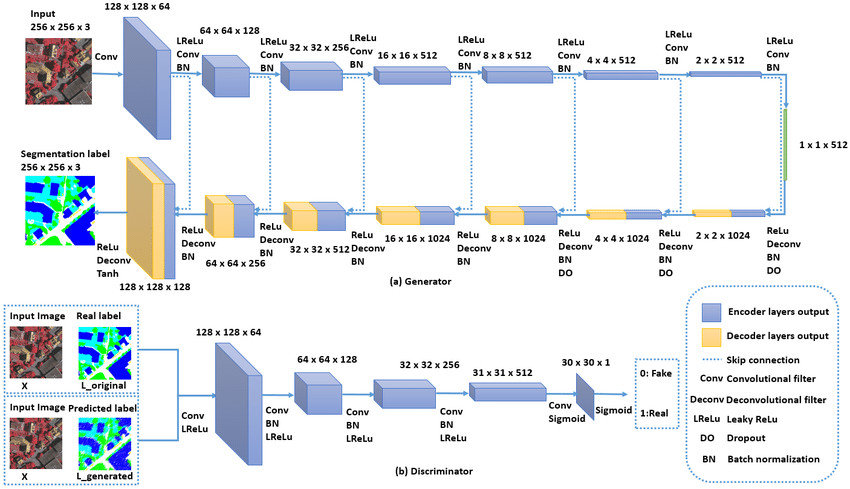

4. **Define the Generator Model**:
   
   
   
   
   - Create a generator model using Keras or TensorFlow.
   
  
   
   
   - Define the input noise vector size and the desired output shape (e.g., CIFAR-10 image dimensions).
   
   
   
   
   - Design the architecture of the generator, typically using convolutional or deconvolutional layers.
   
   
   
   
   - Apply activation functions (e.g., ReLU) and normalization layers (e.g., BatchNormalization) between the layers.
   
   
   
   - The output layer should have an appropriate activation function (e.g., sigmoid or tanh) to generate output samples within the desired range.

## Why do we use Leaky RELU?

Leaky relu helps the Gradient flow easily through the neural network architecture.

* The ReLU activation function only takes the maximum value between input and zero. If we use ReLU then it is a chance that the network can get stuck in a state known as Dying State. If this happens then it produces nothing other than zero for all outputs.





* Our aim is to get the value of gradient from Discriminator to make the generator work, and If the network gets stuck then learning will not happen.






* Leaky ReLU uses a parameter known as alpha to control negative values and never zero passes. If the input is positive then it will exhibit a positive value, and if receive negative then multiply it with alpha and allow some negative value to pass through the network.


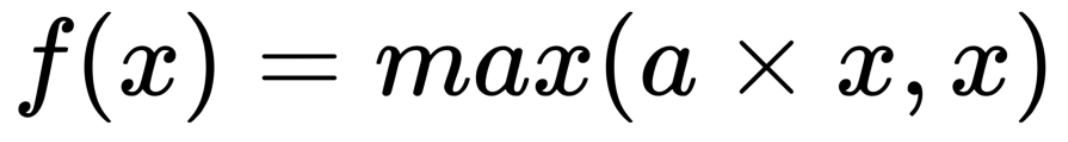

## **Generator**

In [120]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose # Upscale (image big)
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

In [121]:
# define the standalone generator model
def define_generator(latent_dim):
  model = Sequential()
  #foundation for 4x4 image
  n_nodes =  256 * 4 * 4
  model.add(Dense(4096, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4, 4, 256)))
  # upsample to 8x8
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU (alpha=0.2))
  # upsample to 16x16
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU (alpha=0.2))
  # upsample to 32x32
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # output layer
  model.add(Conv2D(3, (3,3), activation= 'tanh', padding='same'))
  return model

## Explanation:
The code defines a standalone generator model. Let's go through the code step by step:

* The function define_generator takes a parameter latent_dim, which represents the dimensionality of the input noise vector.





* Inside the function, a sequential model is created using Sequential().





* The model starts with a fully connected layer (Dense) with 4096 nodes and an input dimension of latent_dim. This layer takes the input noise vector and maps it to a higher-dimensional space.







* The LeakyReLU activation function with an alpha of 0.2 is added after the dense layer. It introduces non-linearity to the model and helps prevent dead neurons.





* The next step is to reshape the output of the previous layer into a 4x4 image-like structure. This is achieved using the Reshape layer with a target shape of (4, 4, 256).





* To increase the spatial dimensions of the image, a series of Conv2DTranspose layers are added. These layers perform upsampling by applying a transposed convolution operation. The first Conv2DTranspose layer increases the image size from 4x4 to 8x8, the second layer increases it to 16x16, and the third layer increases it to 32x32. Each layer is followed by a LeakyReLU activation function with an alpha of 0.2.





* Finally, an output layer is added using the Conv2D layer. It has 3 filters (representing RGB channels) and a kernel size of 3x3. The activation function used is tanh, which maps the output values to the range [-1, 1].




The resulting model is a generator that takes a noise vector as input and outputs synthetic images with a shape of 32x32 pixels.

# What is LATENT SPACE?

The latent space in a Generative Adversarial Network (GAN) refers to a lower-dimensional space that serves as the input to the generator network. It is a conceptual space where random vectors, often called "latent vectors" or "latent samples," are transformed into synthetic data samples by the generator.

The purpose of the latent space is to capture the underlying distribution of the real data in a condensed form. By sampling random vectors from the latent space and passing them through the generator network, the GAN aims to generate realistic synthetic samples that resemble the real data.

The latent space is typically a lower-dimensional space than the space of the real data. It is often chosen to be a continuous, multivariate Gaussian distribution or a uniform distribution. The dimensionality of the latent space, denoted by `latent_dim`, is a hyperparameter that needs to be defined before training the GAN. Larger values of `latent_dim` can allow for more complex and diverse generated samples, but they can also increase the computational complexity of the model.

The goal of training the GAN is to learn a mapping from the latent space to the space of the real data so that the generator can generate samples that are indistinguishable from the real data according to the discriminator network. By exploring and manipulating the latent space, you can control various attributes or features of the generated samples, such as style, pose, or appearance.

The latent space is an abstract representation within the GAN framework and does not have a direct physical interpretation. Its purpose is to enable the generator to learn a meaningful and compact representation of the data distribution, allowing it to generate diverse and realistic samples.

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_63 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 128)        524416    
 nspose)                                                         
                                                                 
 leaky_re_lu_64 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                           

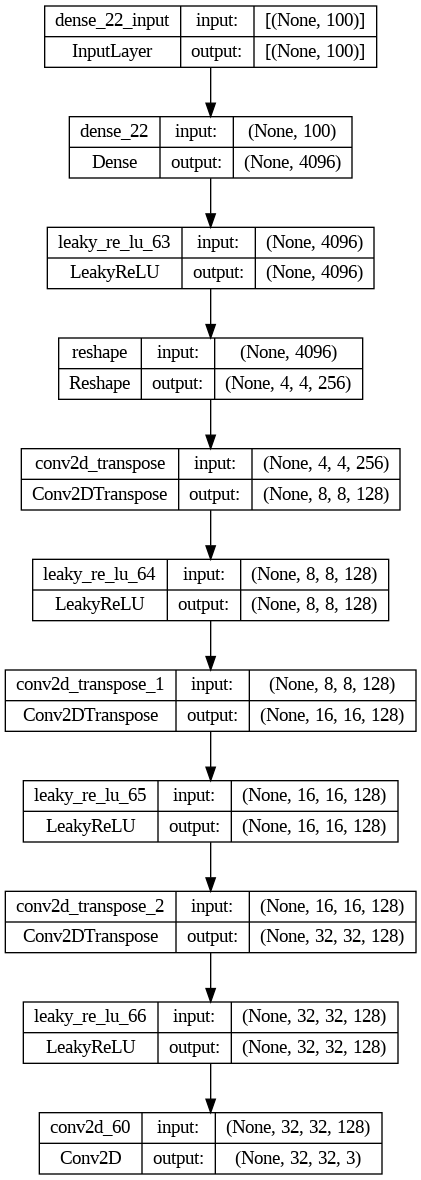

In [122]:
# define the size of the latent space
latent_dim= 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file= 'generator_plot.png', show_shapes=True, show_layer_names=True)

## Generate Latent_points

In [123]:
# generate points in latent space as input for the generator
def generate_latent_points (latent_dim, n_samples):
  # generate points in the latent space
  x_input = np.random.randn (latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
return x_input



## Explanation:
The code in the function called generate_latent_points that generates points in the latent space. Let's go through it line by line:

    def generate_latent_points(latent_dim, n_samples):

This line defines the function generate_latent_points that takes two parameters: latent_dim and n_samples.

    x_input = np.random.randn(latent_dim * n_samples)

This line generates random numbers from a standard normal distribution using np.random.randn. The number of random numbers generated is equal to latent_dim * n_samples, where latent_dim is the size of the latent space and n_samples is the number of samples.

    x_input = x_input.reshape(n_samples, latent_dim)

This line reshapes the generated random numbers into a 2D array with dimensions (n_samples, latent_dim). This is necessary because the generator network expects a batch of inputs, where each input has latent_dim dimensions.

    return x_input

This line returns the generated latent points as the output of the function.

In summary, this function generates random points in the latent space, where the number of points is determined by n_samples and the dimensionality of each point is determined by latent_dim. These generated points can be used as inputs for the generator network in a GAN to produce synthetic data samples.

In [124]:
x_input = generate_latent_points(100,64)
print(x_input.shape)

# we 64*100 images , it gives back 64-32*32*3 images

# these 64 (32*32*3) images as fake data to discriminator

(64, 100)


## Generate Fake images

In [125]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples (g_model, latent_dim, n_samples):
  # generate points in latent space
  x_input= generate_latent_points (latent_dim, n_samples)
  # predict outputs
  X = g_model.predict(x_input)
  # create 'fake' class labels (0)
  y = np.zeros((n_samples, 1))
  return X, y

## Explanation:
The code defines a function called generate_fake_samples. This function is used to generate fake images using a generator model in a GAN (Generative Adversarial Network). Let's break down the code line by line:

    def generate_fake_samples(g_model, latent_dim, n_samples):

This line defines the function generate_fake_samples that takes three parameters: g_model (the generator model), latent_dim (the size of the latent space), and n_samples (the number of fake samples to generate).

       x_input = generate_latent_points(latent_dim, n_samples)

This line calls the function generate_latent_points (which we have explained before) to generate random points in the latent space. The generated points are assigned to the variable x_input.

            X = g_model.predict(x_input)

This line uses the generator model (g_model) to generate fake images by predicting outputs based on the input x_input. The generated images are assigned to the variable X.

         y = np.zeros((n_samples, 1))

This line creates an array y with dimensions (n_samples, 1) filled with zeros. This array represents the class labels for the generated images and is set to 0, indicating that they are "fake" images.

              return X, y

This line returns the generated fake images (X) and their corresponding class labels (y) as the output of the function.
In summary, this function takes a generator model, the size of the latent space, and the number of fake samples to generate. It generates random points in the latent space, uses the generator model to generate fake images based on those points, assigns class labels of 0 to the generated images, and returns the generated images and their labels. These generated fake images can be used to train the discriminator in the GAN framework.

2/2 [==============================] - 1s 152ms/step


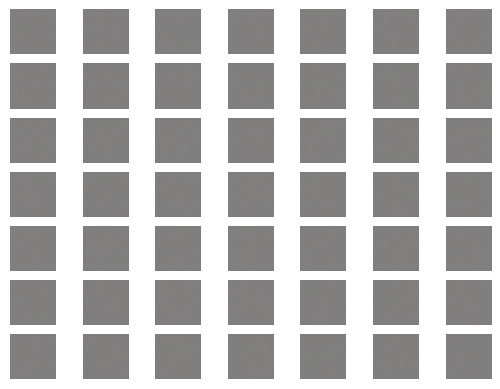

In [126]:
# size of the latent space
latent_dim= 100
# define the discriminator model
model = define_generator (latent_dim)
# generate samples
n_samples = 49
X, _ = generate_fake_samples (model, latent_dim, n_samples)
# scale pixel values from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the generated samples
for i in range (n_samples):
  # define subplot
  pyplot.subplot(7, 7, 1 + i)
  # turn off axis labels
  pyplot.axis('off')
  # plot single image
  pyplot.imshow(X[i])
# show the figure
pyplot.show()

## Explantion:

The code is responsible for generating and visualizing fake images using a generator model in a GAN. Let's break it down:

* The first line sets the size of the latent space to latent_dim=100. The latent space is a high-dimensional space where the generator model generates random points that will be transformed into fake images.




* The second line defines the generator model by calling the define_generator function and passing the latent_dim as an argument. The generator model is responsible for generating fake images based on random points in the latent space.




* Next, the code generates samples by calling the generate_fake_samples function and passing the generator model (model), the latent_dim, and the number of samples (n_samples=49) as arguments. The function returns the generated fake images in the variable X, but we don't need the corresponding class labels, so we use _ to ignore them.




* The code then scales the pixel values of the generated images from the range of [-1, 1] to [0, 1] by adding 1 and dividing by 2. This normalization is necessary to ensure that the pixel values fall within the valid range.




* After that, the code enters a loop that iterates over each generated image. In this loop, it plots each image on a subplot of a 7x7 grid, turns off the axis labels, and displays the image using imshow function from the pyplot module.




Finally, the code displays the figure with all the generated images using the show function from the pyplot module.

The stdout message 2/2 [==============================] - 1s 152ms/step indicates that the model has processed 2 steps of the training or prediction process, and it took approximately 152 milliseconds to complete each step.

5. **Define the GAN Model:**
   
   
   - Combine the generator and discriminator models to form the GAN model.
   
   
   - Set the discriminator's trainable parameter to False to prevent its weights from being updated during GAN training.
   
   
   
   - Define the input noise vector for the generator and connect it to the generator model.
   
   
   
   - Connect the generator output to the discriminator model to obtain the GAN output.

## **Combine Generator and Discriminator model**

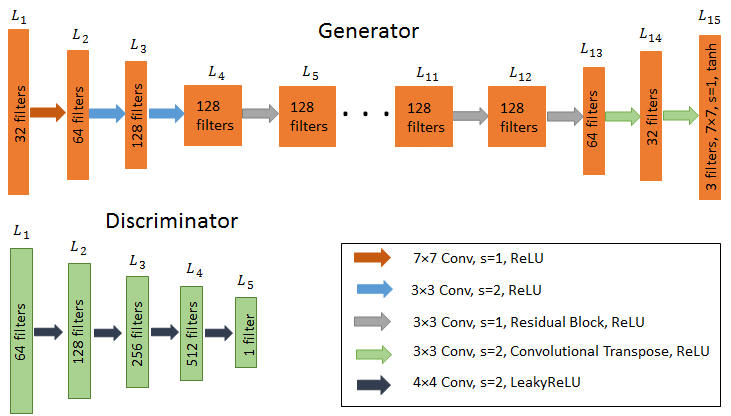

In [128]:
# define the combined generator and discriminator model, for updating the generator
def define_gan (g_model, d_model):
  # make weights in the discriminator not trainable
  d_model.trainable = False
  # connect them
  model= Sequential()
  # add generator
  model.add(g_model)
  # add the discriminator
  model.add(d_model)
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

## Explanation:
The code defines a function called define_gan that combines a generator model and a discriminator model to create a GAN (Generative Adversarial Network) model. The purpose of this combined model is to update the generator during training.

Let's go through the code line by line:

    def define_gan(g_model, d_model):

This line defines the function define_gan that takes two arguments: g_model and d_model, which are the generator and discriminator models, respectively.

      d_model.trainable = False

This line sets the trainable attribute of the discriminator model to False. By doing this, the weights of the discriminator will not be updated during GAN training.

    model = Sequential()

This line creates a new Sequential model, which is an empty linear stack of layers.
  
    model.add(g_model)

This line adds the generator model (g_model) to the model by appending it to the list of layers. This connects the generator to the GAN model.
   
    model.add(d_model)

This line adds the discriminator model (d_model) to the model by appending it to the list of layers. This connects the discriminator to the GAN model.
  
    opt = Adam(lr=0.0002, beta_1=0.5)

This line creates an Adam optimizer with a learning rate of 0.0002 and a momentum parameter (beta_1) of 0.5. The optimizer is used to update the weights of the GAN model during training.
  
    model.compile(loss='binary_crossentropy', optimizer=opt)

This line compiles the GAN model. It specifies the loss function as binary cross-entropy and sets the optimizer to the one created in the previous line (opt).
  
    return model

This line returns the compiled GAN model.
Overall, this code defines a function that combines a generator and discriminator model to create a GAN model. The discriminator is set to be non-trainable, and the generator and discriminator are connected in a sequential manner. The GAN model is then compiled with a specific loss function and optimizer.

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_23 (Sequential)  (None, 32, 32, 3)         1466115   
                                                                 
 sequential_22 (Sequential)  (None, 1)                 522497    
                                                                 
Total params: 1,988,612
Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________


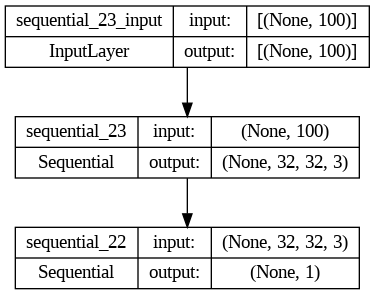

In [129]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator (latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

## Explanation:
The code performs the following steps:

* It sets the size of the latent space (the input to the generator) to 100.



* It creates a discriminator model by calling the define_discriminator() function.



* It creates a generator model by calling the define_generator(latent_dim) function, passing the latent dimension as an argument.



* It creates a GAN model by calling the define_gan(g_model, d_model) function, passing the generator and discriminator models as arguments.




* It summarizes the GAN model by calling the summary() method on the gan_model object, printing information about the model's layers and parameters.



* It plots the GAN model and saves the plot as "gan_plot.png" by calling the plot_model() function.
The STDOUT output shows a summary of the GAN model, indicating the layers in the model, their output shapes, and the number of parameters. The model consists of two sequential models: the first one with an output shape of (None, 32, 32, 3) and the second one with an output shape of (None, 1). The total number of parameters in the GAN model is 1,988,612, out of which 1,466,115 are trainable, and 522,497 are non-trainable.


    
The code successfully creates and summarizes the GAN model, and also generates a plot of the model's architecture.

## Freezing the discriminator.
Freezing the discriminator in a Generative Adversarial Network (GAN) refers to the practice of keeping the discriminator's weights fixed during the training of the generator. By freezing the discriminator, the generator is trained without updating the discriminator's parameters, allowing the generator to focus on improving its ability to generate realistic samples.

Freezing the discriminator can be beneficial in certain scenarios, such as when the discriminator has already achieved a good level of performance and is capable of accurately distinguishing between real and fake samples. In such cases, freezing the discriminator prevents it from overfitting or dominating the training process.

To freeze the discriminator, you need to set the `trainable` attribute of its layers to `False`. This ensures that the discriminator's weights are not updated during the training of the composite model. Here's an example of how you can freeze the discriminator in Keras:

```python
# Assuming you have a composite model with a generator and discriminator
composite_model = ...

# Freeze the discriminator by setting its trainable attribute to False
for layer in composite_model.discriminator.layers:
    layer.trainable = False

# Compile the composite model
composite_model.compile(...)
```

By freezing the discriminator in the composite model, only the generator's weights will be updated during the training process. This allows the generator to learn and improve its ability to generate realistic samples without the discriminator's feedback.

It's worth noting that freezing the discriminator is not always necessary or beneficial. In some cases, it may be desirable to continue training the discriminator to adapt to changes in the generator's performance or to improve its discrimination ability. The decision to freeze or continue training the discriminator depends on the specific GAN architecture, dataset, and training dynamics.

## Train the generator and discriminator

In [135]:
# train the generator and discriminator
def train (g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      # get randomly selected 'real' samples
      X_real, y_real = generate_real_samples (dataset, half_batch)
      # update discriminator model weights
      d_loss1, _ = d_model.train_on_batch(X_real, y_real)
      # generate 'fake' examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # update discriminator model weights
      d_loss2, _ = d_model.train_on_batch (X_fake, y_fake)
      # prepare points in latent space as input for the generator
      X_gan = generate_latent_points (latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = np.ones((n_batch, 1))
      # update the generator via the discriminator's error
      g_loss = gan_model.train_on_batch (X_gan, y_gan)
      # summarize loss on this batch
      print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
        (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
    # evaluate the model performance, sometimes
    if (i+1) % 10 == 0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)


## Explanation:
The code  is responsible for training the generator and discriminator models of a Generative Adversarial Network (GAN). Let's break down the code step by step:

1. The train function is defined, which takes the generator model (g_model), discriminator model (d_model), GAN model (gan_model), ataset, latent dimension (latent_dim), number of epochs (n_epochs), and batch size (n_batch) as input.



2. The variable bat_per_epo is calculated by dividing the total number of samples in the dataset by the batch size. It represents the number of batches per epoch.



3. The variable half_batch is calculated by dividing the batch size by 2. It represents half the batch size and is used later.



4. A loop is initiated for the number of epochs specified.




5. Within each epoch loop, another loop is initiated for each batch in the epoch.




6. Within each batch loop, the code performs the following steps:

* Real samples (X_real) and their corresponding labels (y_real) are generated by calling the generate_real_samples function, which randomly selects real samples from the dataset.

* The discriminator model (d_model) is trained on the real samples using the train_on_batch function, which updates the discriminator model's weights. The resulting loss is stored in d_loss1, but the second returned value (which represents the metrics) is ignored by using _.

* Fake samples (X_fake) and their corresponding labels (y_fake) are generated by calling the generate_fake_samples function, which uses the generator model (g_model) and latent dimension (latent_dim) to generate fake samples.

* The discriminator model (d_model) is trained on the fake samples using the train_on_batch function. Again, the resulting loss is stored in d_loss2.

* Points in the latent space (X_gan) are generated by calling the generate_latent_points function, which creates random points in the latent space.

*  Inverted labels (y_gan) are created for the fake samples. These inverted labels represent the generator's intention to fool the discriminator.

* The generator model (g_model) is updated by training it on the latent points and inverted labels using the train_on_batch function. The resulting loss is stored in g_loss.

* The loss values for the current batch are printed in the format >epoch, batch/total_batches, d1=d_loss1, d2=d_loss2, g=g_loss.




7. After the inner batch loop finishes, the code checks if the current epoch is a multiple of 10 (i.e., (i+1) % 10 == 0). If true, the summarize_performance function is called, which evaluates the performance of the generator and discriminator models on the dataset.

That's the explanation of the code in the FOCAL CELL. It trains the GAN models by updating the discriminator and generator models alternately using real and fake samples, respectively.

6. **Compile the GAN Model:**
   - Set the loss function for the GAN model. Typically, the generator loss is based on the discriminator's classification of generated samples.
   - Compile the GAN model with an appropriate optimizer (e.g., Adam) and learning rate.

## Performance

In [132]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance (epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
  # prepare real samples
  X_real, y_real = generate_real_samples (dataset, n_samples)
  # evaluate discriminator on real examples
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  # prepare fake examples
  x_fake, y_fake = generate_fake_samples (g_model, latent_dim, n_samples)
  # evaluate discriminator on fake examples
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
  # summarize discriminator performance
  print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
  # save plot
  save_plot(x_fake, epoch)
  # save the generator model tile file
  filename = 'generator_model_%03d.h5' % (epoch+1)
  g_model.save(filename)

## Explanation:
The code defines a function called summarize_performance which is responsible for evaluating the performance of the generator and discriminator models in a Generative Adversarial Network (GAN). Here is a line-by-line explanation of the code:

def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):

This line defines the summarize_performance function that takes in several arguments: epoch (the current epoch number), g_model (the generator model), d_model (the discriminator model), dataset (the dataset used for evaluation), latent_dim (the dimension of the latent space), and an optional argument n_samples which defaults to 150.

         X_real, y_real = generate_real_samples(dataset, n_samples)

This line generates real samples (X_real) and their corresponding labels (y_real) by calling the generate_real_samples function, which randomly selects real samples from the dataset.

     _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)

This line evaluates the discriminator model (d_model) on the real samples (X_real) and their labels (y_real) using the evaluate function. The resulting accuracy is stored in acc_real, but the first returned value (which represents the loss) is ignored by using _.

       x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)

This line generates fake samples (x_fake) and their corresponding labels (y_fake) by calling the generate_fake_samples function, which uses the generator model (g_model) and the latent dimension (latent_dim) to generate fake samples.

       _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)

This line evaluates the discriminator model (d_model) on the fake samples (x_fake) and their labels (y_fake) using the evaluate function. The resulting accuracy is stored in acc_fake, but the first returned value (which represents the loss) is ignored by using _.

     print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

This line prints the accuracy of the discriminator model on real and fake samples in the format ">Accuracy real: X%, fake: Y%".

    save_plot(x_fake, epoch)

This line saves a plot of the generated fake samples (x_fake) by calling the save_plot function, which likely generates a visualization of the generated images.

      filename = 'generator_model_%03d.h5' % (epoch+1)
      g_model.save(filename)

This line constructs a filename for the generator model based on the current epoch number (epoch) and saves the generator model (g_model) to that file in HDF5 format.
That's the explanation of the code in the FOCAL CELL. It evaluates the discriminator's performance on real and fake samples, prints the accuracy, saves a plot of the generated images, and saves the generator model to a file.

In [133]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
  # scale from [-1,1] to [0,1]
  examples = (examples + 1) / 2.0
  # plot images
  for i in range(n* n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i])
    # save plot to file
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    pyplot.savefig(filename)
    pyplot.close()

## Explanation:
The code in the FOCAL CELL defines a function called save_plot which is responsible for creating and saving a plot of generated images. Here is a line-by-line explanation of the code:

     def save_plot(examples, epoch, n=7):

This line defines the save_plot function that takes in three arguments: examples (the generated images), epoch (the current epoch number), and an optional argument n which defaults to 7. The n argument determines the number of images to be plotted in a grid.

     examples = (examples + 1) / 2.0

This line scales the pixel values of the generated images from the range of [-1, 1] to [0, 1]. This transformation is necessary to correctly display the images.

  for i in range(n * n):

This line starts a loop that iterates n * n times. It will iterate over each position in the grid where an image will be plotted.

    pyplot.subplot(n, n, 1 + i)

This line defines a subplot within the grid, specifying the position for the current image to be plotted.

    pyplot.axis('off')

This line turns off the axis for the current subplot, hiding the coordinate axes.

    pyplot.imshow(examples[i])

This line plots the i-th generated image on the current subplot.

    filename = 'generated_plot_e%03d.png' % (epoch+1)
    pyplot.savefig(filename)
    pyplot.close()

These lines save the current plot as an image file. The filename is constructed based on the current epoch number (epoch) and the file is saved in PNG format. After saving the plot, the plot window is closed to free up system resources.

That's the explanation of the code in the FOCAL CELL. It takes generated images, scales their pixel values, plots them in a grid, saves the plot as an image file with a filename based on the epoch number, and closes the plot window.


7. **Train the GAN:**
   - Set the number of training epochs and batch size.
   - For each epoch:
     - Sample random noise vectors as input to the generator.
     - Generate fake samples using the generator.
     - Sample real samples from the CIFAR-10 dataset.
     - Train the discriminator:
       - Combine real and fake samples with their corresponding labels (real or fake).
       - Update the discriminator's weights using the combined samples and labels.
     - Train the generator:
       - Generate new fake samples and set their labels as real (to fool the discriminator).
       - Update the GAN model using the generated samples and labels.
   - Monitor the training progress and evaluate the generator's performance on generated samples.

In [ ]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128)


2/2 [==============================] - 1s 258ms/step
>1, 1/390, d1=0.164, d2=0.506 g=1.057
2/2 [==============================] - 1s 266ms/step
>1, 2/390, d1=0.070, d2=0.495 g=1.064
2/2 [==============================] - 1s 252ms/step
>1, 3/390, d1=0.095, d2=0.561 g=0.969
2/2 [==============================] - 1s 253ms/step
>1, 4/390, d1=0.065, d2=0.649 g=0.843
2/2 [==============================] - 1s 414ms/step
>1, 5/390, d1=0.106, d2=0.715 g=0.726
2/2 [==============================] - 1s 256ms/step
>1, 6/390, d1=0.068, d2=0.744 g=0.710
2/2 [==============================] - 1s 245ms/step
>1, 7/390, d1=0.052, d2=0.754 g=0.717
2/2 [==============================] - 1s 245ms/step
>1, 8/390, d1=0.045, d2=0.759 g=0.758
2/2 [==============================] - 1s 251ms/step
>1, 9/390, d1=0.076, d2=0.691 g=0.828
2/2 [==============================] - 1s 424ms/step
>1, 10/390, d1=0.084, d2=0.595 g=0.949
2/2 [==============================] - 1s 253ms/step
>1, 11/390, d1=0.030, d2=0.473 g=1.1

8. **Generate New Samples:**
   - After training, use the trained generator model to generate new samples by feeding random noise vectors as input.
   - Display or save the generated samples to evaluate the performance of the trained GAN.

 

In [ ]:
# The Final Generator Model to Generate Images

# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# plot the generated images
def create_plot(examples, n):
    # plot images
    for i in range(n * n):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
         # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i, :, :])
    pyplot.show()

# load model
model = load_model('generator_model_200.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
create_plot(X, 10)


## Exlanation
* The code in the FOCAL CELL is responsible for generating new images using a trained generator model and then plotting and displaying these generated images. Let's go through the code step by step:

* The code starts by importing necessary modules: load_model from keras.models to load the generator model, randn from numpy.random to generate random noise vectors, and pyplot from matplotlib for plotting.

* Next, there is a function called generate_latent_points defined. This function generates random points in the latent space, which will serve as input to the generator model. It takes two arguments: latent_dim (the dimensionality of the latent space) and n_samples (the number of points to generate). It generates random numbers using randn and then reshapes them into a batch of inputs for the generator.

* The next function is create_plot. This function is responsible for plotting the generated images. It takes two arguments: examples (the generated images) and n (the number of images to be plotted in a grid). It uses a loop to iterate over each position in the grid and plots the corresponding image using pyplot.imshow. The axis is turned off for each subplot using pyplot.axis('off').

* The code then loads the generator model using load_model. The generator model is loaded from a file named 'generator_model_200.h5'.

* Next, the code generates new images by calling the generate_latent_points function with latent_dim=100 (the dimensionality of the latent space) and n_samples=100 (the number of images to generate).

* The generator model is then used to generate images by calling model.predict with the generated latent points.

* The pixel values of the generated images are scaled from the range of [-1, 1] to [0, 1] using the expression (X + 1) / 2.0.

* Finally, the function create_plot is called with the generated images X and n=10 to plot and display the images in a grid.

That's the explanation of the code in the FOCAL CELL. It loads a trained generator model, generates new images using random noise vectors, scales the pixel values, and plots and displays the generated images.

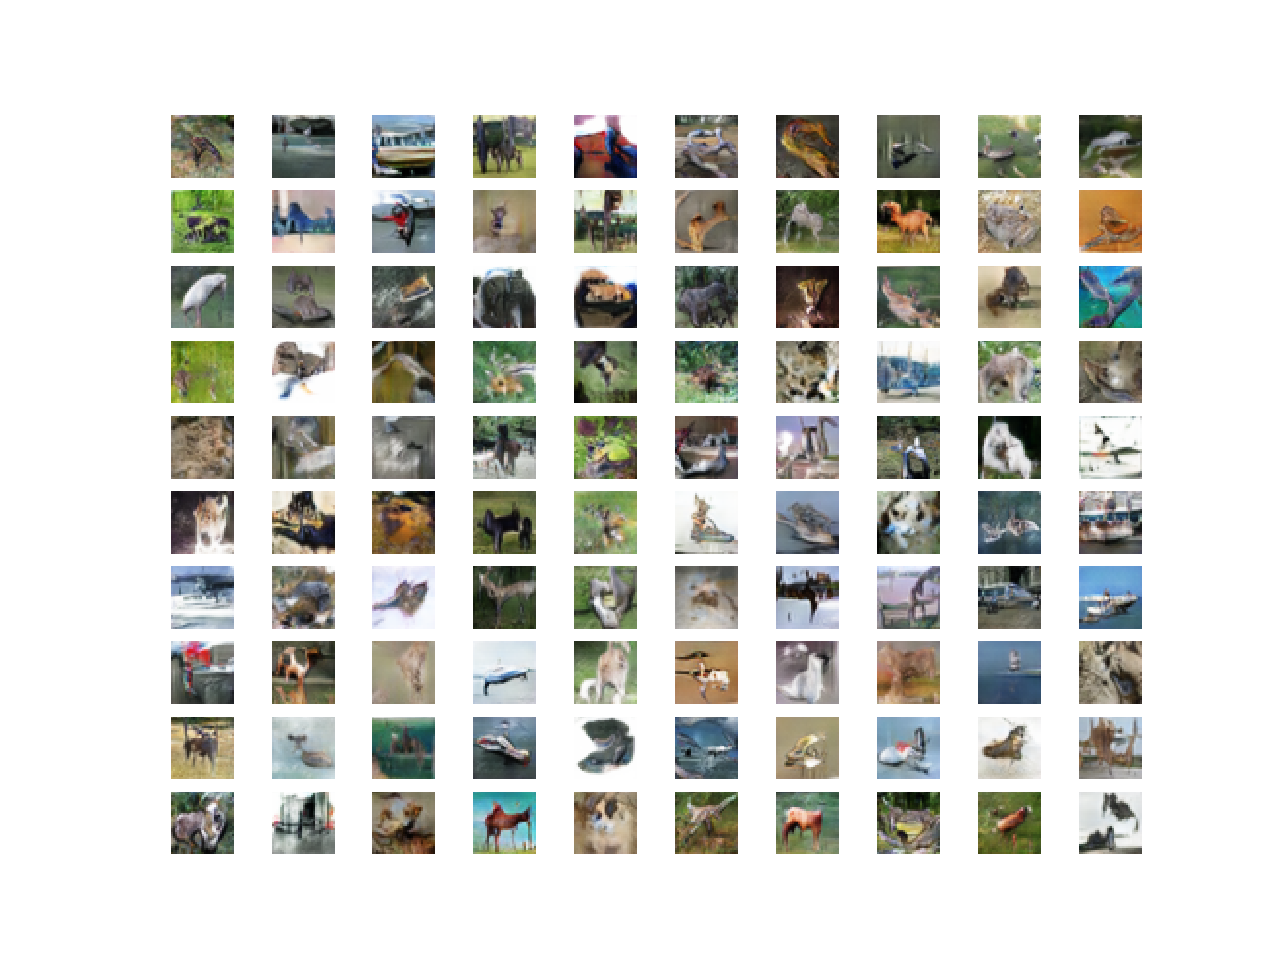

## Explanation
 Here's an outline of how you can generate new samples using the trained generator model after training the GAN:
 

In this code snippet, you can generate a specified number of new samples by providing random noise vectors as input to the trained generator model. The `num_samples` variable indicates how many samples you want to generate. The noise vectors are sampled from a normal distribution with mean 0 and standard deviation 1.

After generating the samples, you can choose to display them or save them for further evaluation. The `display_sample()` function is a placeholder that you can customize based on how you want to visualize the generated samples. The `save_sample()` function is also a placeholder that you can customize to save the generated samples to a file, such as an image file (e.g., PNG).

Feel free to adapt this code to suit your specific needs and preferences for displaying or saving the generated samples.

## Applications of Generative Adversarial Networks (GANs)


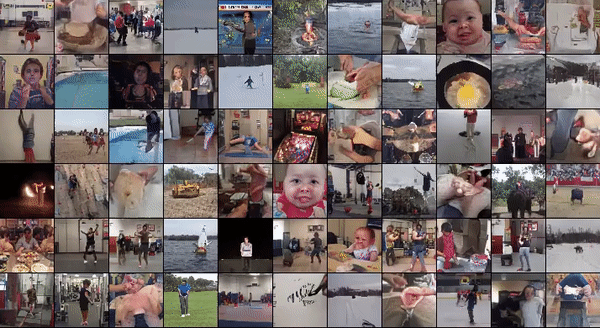

1. Generate new data from available data – It means generating new samples from an available sample that is not similar to a real one.


2. Generate realistic pictures of people that have never existed.


3. Gans is not limited to Images, It can generate text, articles, songs, poems, etc.



4. Generate Music by using some clone Voice – If you provide some voice then GANs can generate a similar clone feature of it. In this research paper, researchers from NIT in Tokyo proposed a system that is able to generate melodies from lyrics with help of learned relationships between notes and subjects.



5. Text to Image Generation (Object GAN and Object Driven GAN)



6. Creation of anime characters in Game Development and animation production.



7. Image to Image Translation – We can translate one Image to another without changing the background of the source image. For example, Gans can replace a dog with a cat.



8. Low resolution to High resolution – If you pass a low-resolution Image or video, GAN can produce a high-resolution Image version of the same.



9. Prediction of Next Frame in the video – By training a neural network on small frames of video, GANs are capable to generate or predict a small next frame of video. For example, you can have a look at below GIF



10. Interactive Image Generation – It means that GANs are capable to generate images and video footage in an art form if they are trained on the right real dataset.



11. Speech – Researchers from the College of London recently published a system called GAN-TTS that learns to generate raw audio through training on 567 corpora of speech data.


## Components of Generative Adversarial Networks (GANs)


 

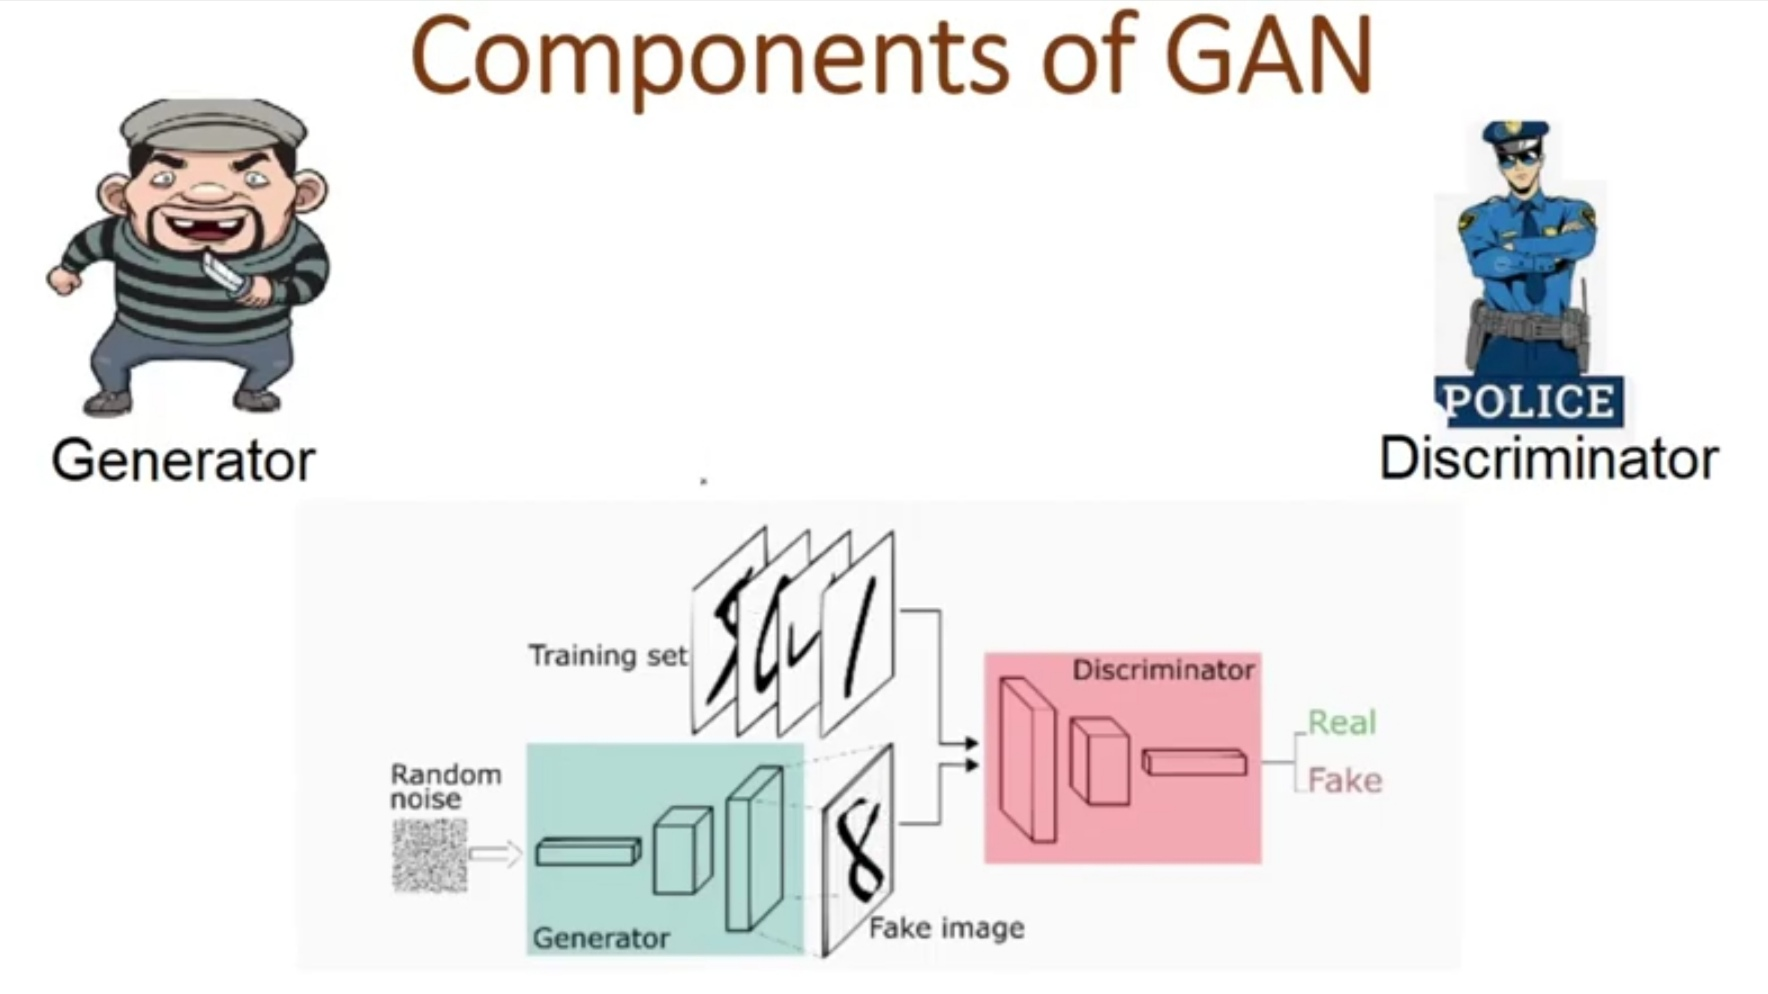

Two major components of GANs are **Generator and Discriminator**. 

* The role of the generator is like a thief to generate the fake samples based on the original sample and make the discriminator fool to understand Fake as real. 



* On the other hand, a Discriminator is like a Police whose role is to identify the abnormalities in the samples created by Generator and classify them as Fake or real.


* This competition between both the component goes on until the level of perfection is achieved where Generator wins making a Discriminator fool on fake data.



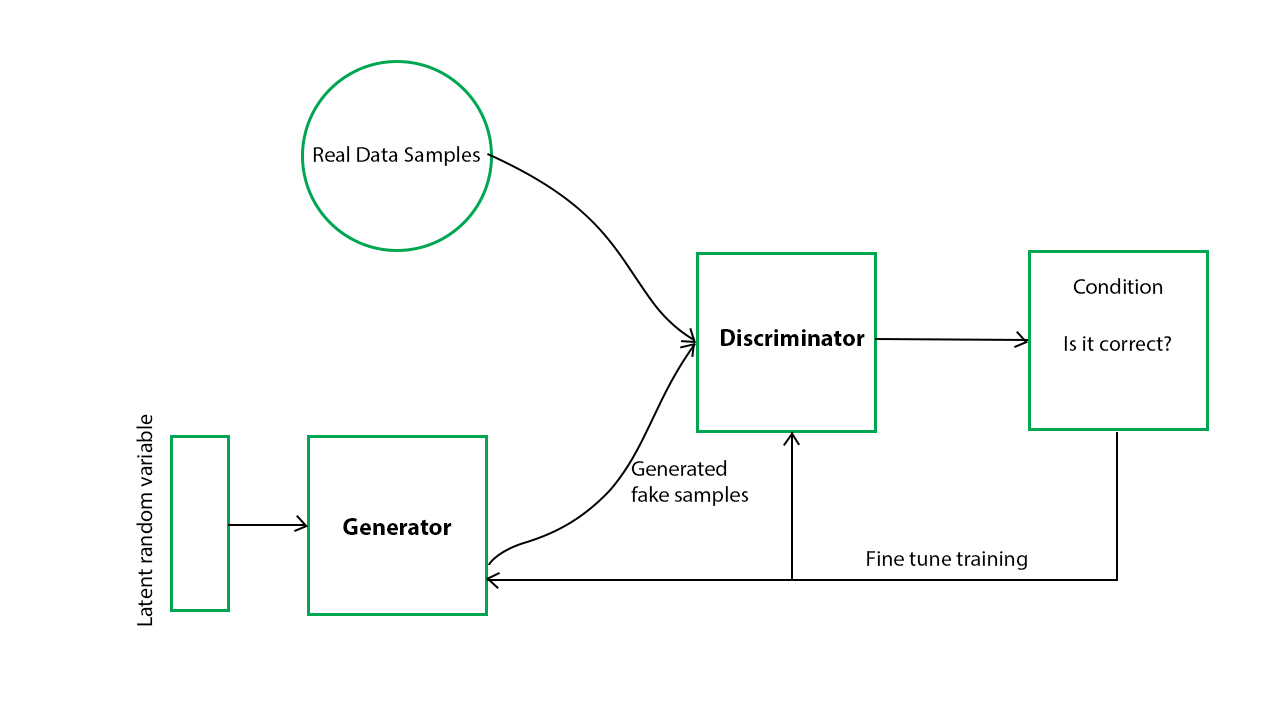

**GANs have been used for a variety of tasks, including:**

* Image generation


* Text generation



* Audio generation



* Video generation



* Data augmentation



* Anomaly detection

GANs are a powerful tool for generative AI, but they can be difficult to train and can be susceptible to mode collapse, where the generator starts to produce only a small number of output patterns.

Here are some of the most common use cases for GANs:

* **Image generation:** GANs can be used to generate realistic images of people, objects, and scenes. This has been used for a variety of applications, such as creating virtual assistants, generating product images for e-commerce websites, and creating realistic visual effects for movies and TV shows.






* **Text generation:** GANs can be used to generate realistic text, such as news articles, product descriptions, and even poems. This has been used for a variety of applications, such as creating synthetic data for training machine learning models, generating creative content, and even writing code.






* **Audio generation:** GANs can be used to generate realistic audio, such as music, speech, and even environmental sounds. This has been used for a variety of applications, such as creating virtual assistants, generating music for movies and TV shows, and even creating realistic sound effects for video games.






* **Video generation:** GANs can be used to generate realistic videos, such as people talking, objects moving, and even entire scenes. This has been used for a variety of applications, such as creating virtual reality experiences, generating training data for machine learning models, and even creating realistic visual effects for movies and TV shows.






* **Data augmentation:** GANs can be used to augment data sets by creating new data that is similar to the existing data. This can be useful for training machine learning models, as it can help to prevent overfitting.







* **Anomaly detection:** GANs can be used to detect anomalies in data. This can be useful for identifying fraudulent transactions, detecting security breaches, and even identifying medical problems.

GANs are a powerful tool for generative AI, and they are being used for a variety of applications. As GANs continue to develop, we can expect to see even more innovative and creative applications for this technology.

## Different Types of Generative Adversarial Networks (GANs)

Here are some of the different types of Generative Adversarial Networks (GANs):

* **Vanilla GAN:** This is the simplest type of GAN. It consists of two neural networks: the generator and the discriminator. The generator is responsible for creating new data, and the discriminator is responsible for distinguishing between real and fake data.
 


 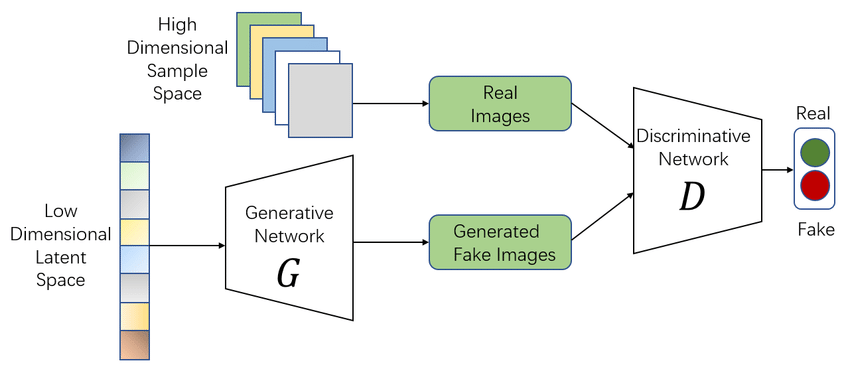

* **Conditional GAN (CGAN):** This type of GAN allows the generator to create data that is conditioned on a set of input data. For example, a CGAN could be used to generate images of faces that are conditioned on a set of facial features.
 
 
 
 

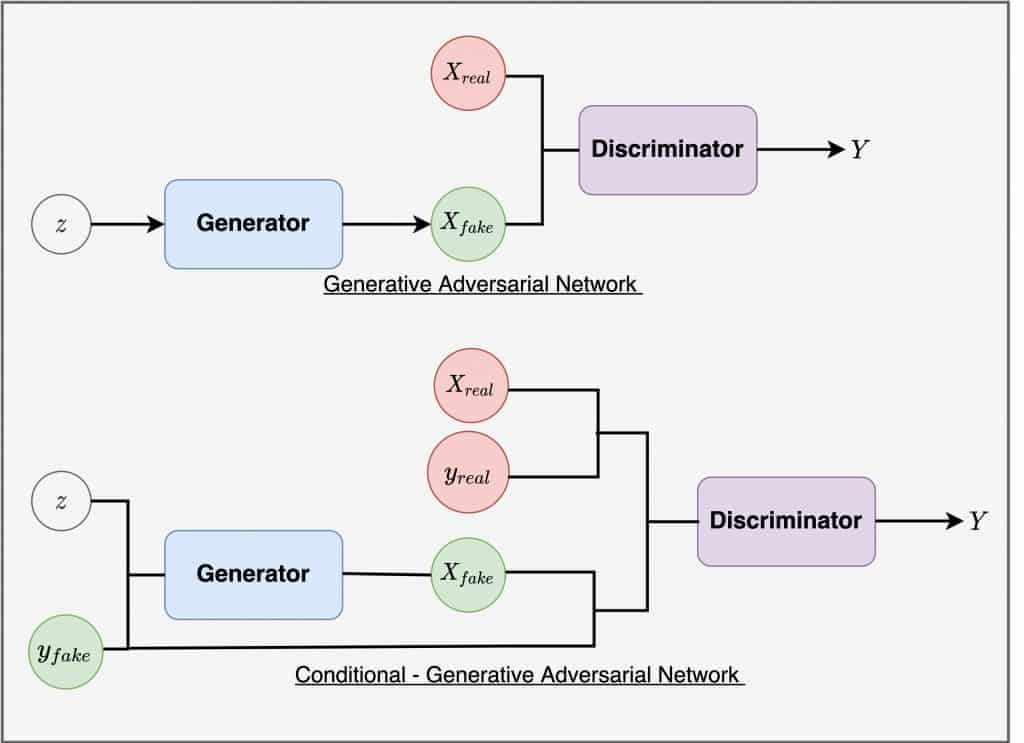

 * **Deep Convolutional GAN (DCGAN):** This type of GAN uses convolutional neural networks for both the generator and the discriminator. DCGANs are typically used to generate images, and they have been shown to produce high-quality results.

 

 

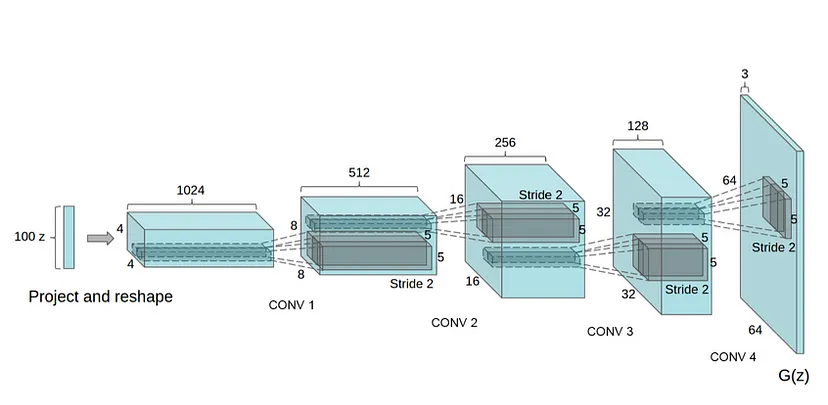

* **Wasserstein GAN (WGAN):** This type of GAN uses a different loss function than vanilla GANs. The WGAN loss function is designed to encourage the generator to create data that has the same distribution as the real data.
 
 

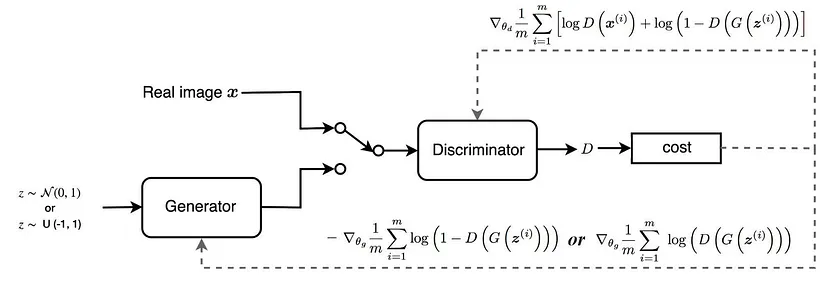

* **StyleGAN:** This type of GAN is a recent development that has produced some of the most realistic images generated by GANs. StyleGAN uses a technique called progressive growing to gradually increase the size of the generator network. This allows the generator to learn to create more complex and detailed images.
 

 

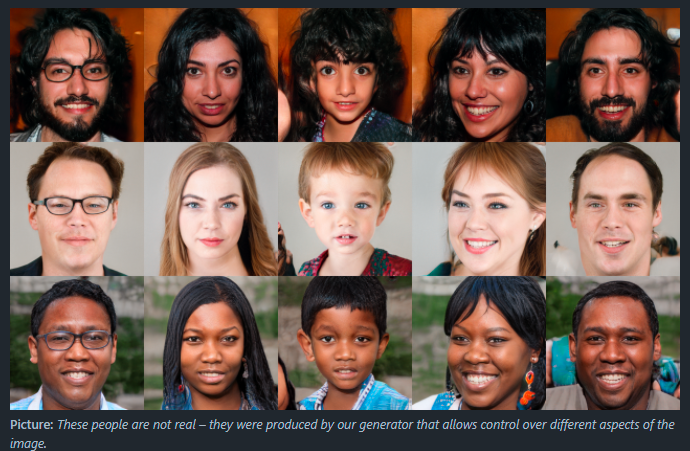

* **Least Square GAN(LSGAN)** – It is a type of GAN that adopts the least-square loss function for the discriminator. Minimizing the objective function of LSGAN results in minimizing the Pearson divergence.

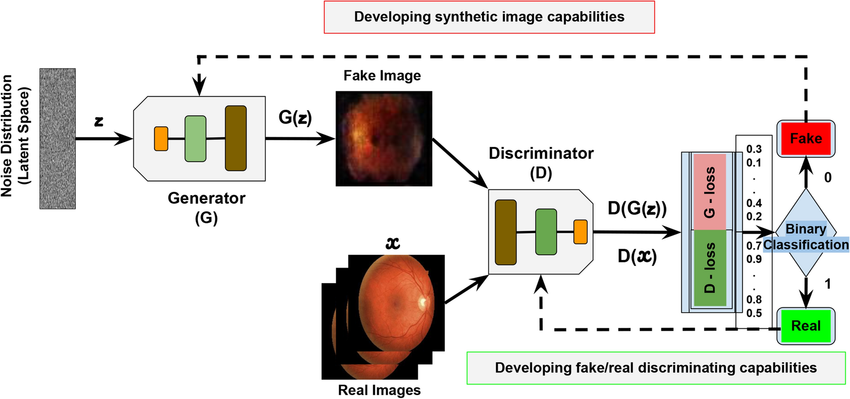

* **Cycle GAN** - The main idea behind CycleGAN is the use of cycle consistency. Given two domains, such as horses and zebras, CycleGAN aims to learn mappings between these domains. It consists of two generator networks, G and F, and two discriminator networks, D_X and D_Y.

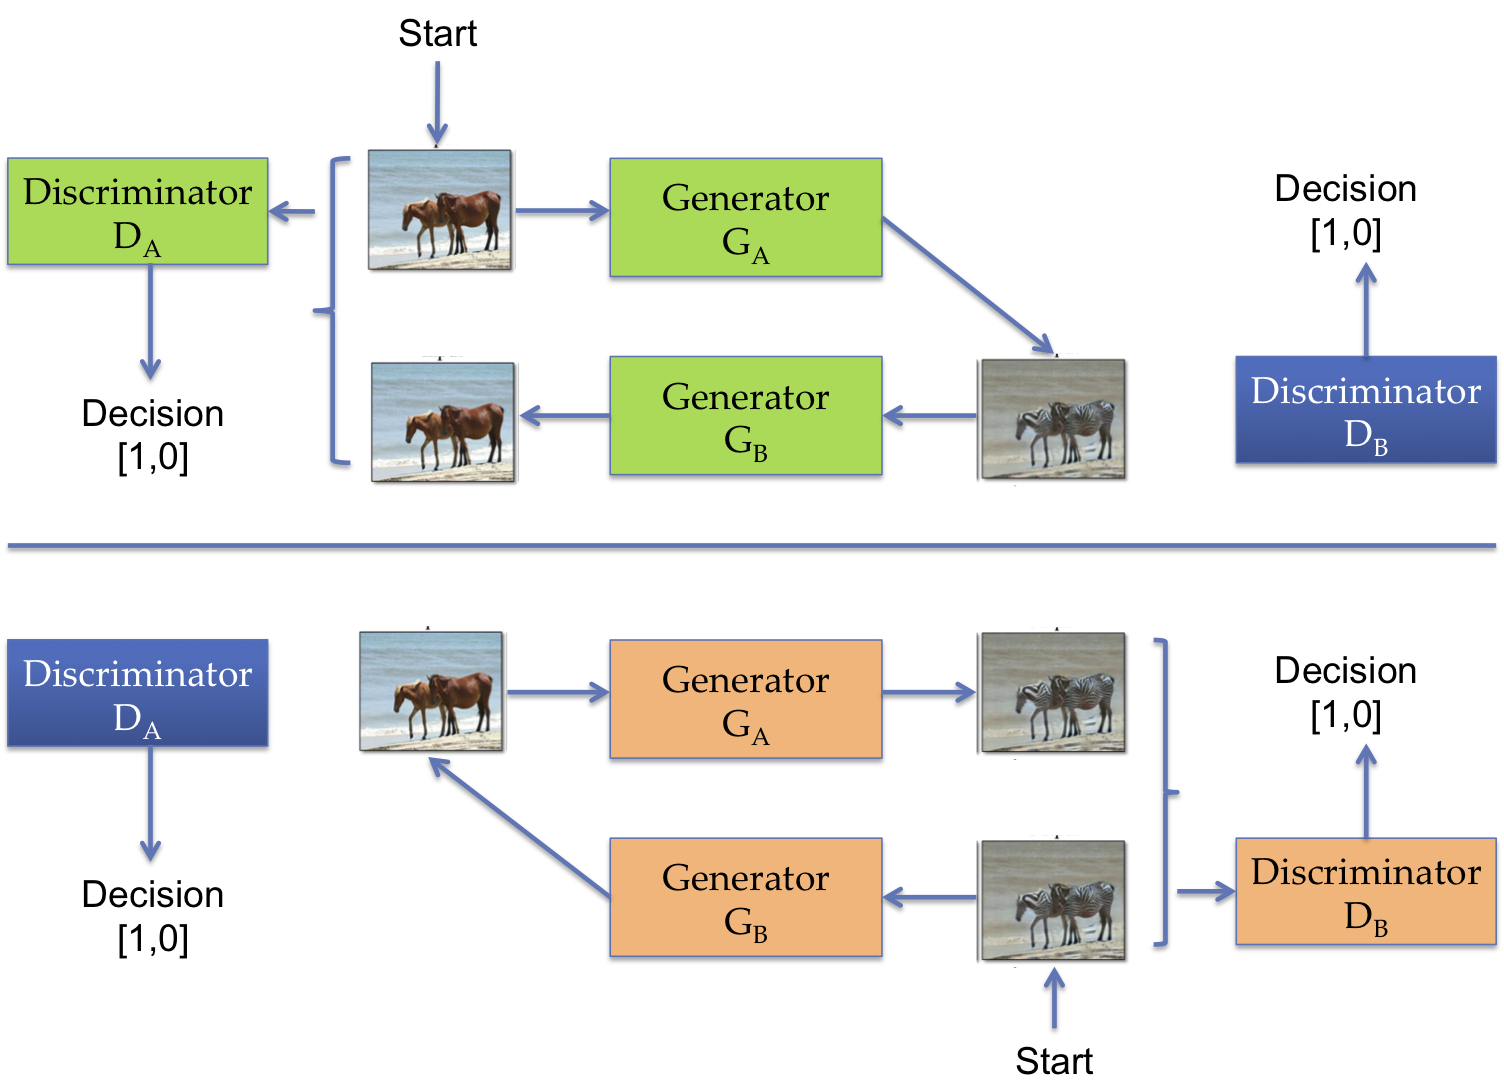